# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

1. Follow the pseudocode in the book exactly.
2. Learn about the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem).


These links are to help me navigate your notebook:

1. [Four Color Connecticut](#four_ct)
2. [Three Color Connecticut](#three_ct)
3. [Four Color Europe](#four_eu)
4. [Three Color Europe](#three_eu)


## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using at most four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                 (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
           (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
print(connecticut)

{'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140), (104, 77), (197, 94), (123, 142)], 'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4), (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)], 'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland', 'New Haven', 'New London', 'Hartford']}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>Do not use NetworkX nodes as the data structure for your assignment.
    We are only using it to color the maps.
    Use basic Python data structures as specified in the general programming requirements.</p>
</div>


In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

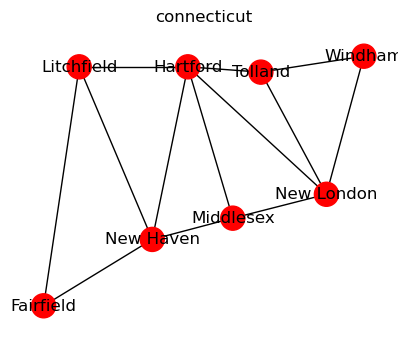

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. Look at the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You *must* implement **Degree Heuristic** (to pick variables) and **Least Constraining Value** (to pick values).
You *may* implement **Minimum Remaining Values** as a tie breaker, if you like.
Otherwise, break ties in ascending order (least to most).
(Which functions in the pseudocode represent the heuristics?).

You should get the backtracking and forward checking implemented first. 
Then add the heuristics. 
You must use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. 
When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

```
Required:
    backtracking: ?
    forward checking: ?
    degree heuristic: ?
    least contraining value: ?
Optional:    
    minimum remaining values: ?
```  

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`.

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement):

1. The variable selected and why.
2. The values proposed in order.
3. backtracking detected by forward checking (empty domains).

Don't print out a lot of noise.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

In [5]:
def color_map(planar_map, color_list, trace=False):
    return [(n, "red") for n in planar_map["nodes"]]

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [6]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

<a id="four_ct"></a>
#### Test Cases

In [7]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

Fairfield and Litchfield are adjacent but have the same color.
Fairfield and New Haven are adjacent but have the same color.
Litchfield and New Haven are adjacent but have the same color.
Litchfield and Hartford are adjacent but have the same color.
New Haven and Hartford are adjacent but have the same color.
New Haven and Middlesex are adjacent but have the same color.
Hartford and Middlesex are adjacent but have the same color.
Hartford and Tolland are adjacent but have the same color.
Hartford and New London are adjacent but have the same color.
Middlesex and New London are adjacent but have the same color.
Tolland and New London are adjacent but have the same color.
Tolland and Windham are adjacent but have the same color.
New London and Windham are adjacent but have the same color.


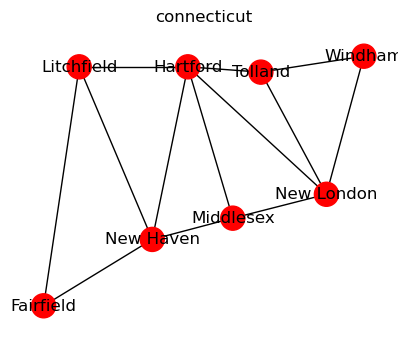

In [8]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

<a id="three_ct"></a>
## Does the Four Color Theorem apply here?

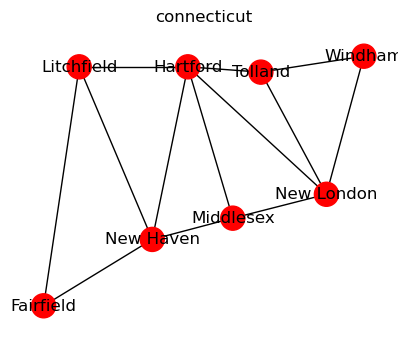

In [9]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=False)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [10]:
europe = {
    'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57),
                 (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32),
                 (94, 97), (143, 149), (140, 111), (110, 67), (127, 40),
                 (118, 47), (111, 54), (189, 39), (202, 33), (82, 74),
                 (110, 162), (137, 102), (93, 55), (125, 32), (128, 37),
                 (122, 42), (116, 53), (124, 65), (146, 87), (138, 54),
                 (137, 41), (64, 90), (130, 22), (168, 29), (78, 55),
                 (116, 144), (122, 57), (158, 65), (122, 78), (112, 60),
                 (127, 48), (191, 118), (100, 78), (102, 35)],
 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22),
           (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24),
           (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12),
           (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37),
           (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23),
           (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30),
           (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 39),
           (15, 41), (15, 29), (41, 4), (41, 24), (41, 45), (41, 18), (41, 38),
           (41, 29), (4, 24), (24, 45), (45, 1), (45, 34), (45, 25), (45, 27),
           (45, 17), (45, 28), (45, 18), (34, 25), (34, 26), (34, 32), (34, 6),
           (34, 35), (25, 26), (25, 16), (25, 27), (26, 16), (26, 42), (26, 32),
           (16, 27), (16, 42), (27, 17), (27, 42), (17, 42), (17, 28), (42, 28),
           (42, 38), (42, 31), (42, 32), (28, 18), (28, 38), (18, 38), (38, 29),
           (38, 39), (38, 31), (29, 39), (30, 39), (30, 43), (39, 5), (39, 31),
           (39, 43), (5, 31), (31, 32), (32, 35), (6, 35), (35, 19), (35, 11),
           (35, 20), (19, 11), (19, 20), (19, 43), (11, 20), (20, 43)],
 'nodes': ['Portugal', 'Malta', 'Iceland', 'Ireland', 'Liechtenstein',
           'Moldova', 'Cyprus', 'Spain', 'Netherlands', 'Luxembourg',
           'Lithuania', 'Armenia', 'Denmark', 'Finland', 'Estonia',
           'Czech Republic', 'Kosovo', 'Bosnia Herzegovina', 'Slovenia',
           'Georgia', 'Azerbaijan', 'Belgium', 'Norway', 'Latvia',
           'Switzerland', 'Albania', 'Macedonia', 'Montenegro', 'Croatia',
           'Slovakia', 'Belarus', 'Romania', 'Bulgaria', 'United Kingdom',
           'Greece', 'Turkey', 'France', 'Sweden', 'Hungary', 'Ukraine',
           'Poland', 'Austria', 'Serbia', 'Russia', 'Germany', 'Italy']}
print(europe)

{'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57), (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32), (94, 97), (143, 149), (140, 111), (110, 67), (127, 40), (118, 47), (111, 54), (189, 39), (202, 33), (82, 74), (110, 162), (137, 102), (93, 55), (125, 32), (128, 37), (122, 42), (116, 53), (124, 65), (146, 87), (138, 54), (137, 41), (64, 90), (130, 22), (168, 29), (78, 55), (116, 144), (122, 57), (158, 65), (122, 78), (112, 60), (127, 48), (191, 118), (100, 78), (102, 35)], 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22), (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24), (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12), (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37), (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23), (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30), (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 

In [11]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Here we're testing to see if the adjacent nodes are colored differently:

<a id="four_eu"></a>
#### Test Cases

In [12]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

Iceland and Ireland are adjacent but have the same color.
Iceland and United Kingdom are adjacent but have the same color.
Ireland and United Kingdom are adjacent but have the same color.
United Kingdom and France are adjacent but have the same color.
United Kingdom and Belgium are adjacent but have the same color.
United Kingdom and Netherlands are adjacent but have the same color.
United Kingdom and Norway are adjacent but have the same color.
Portugal and Spain are adjacent but have the same color.
Spain and France are adjacent but have the same color.
Spain and Italy are adjacent but have the same color.
France and Belgium are adjacent but have the same color.
France and Luxembourg are adjacent but have the same color.
France and Germany are adjacent but have the same color.
France and Switzerland are adjacent but have the same color.
France and Italy are adjacent but have the same color.
Belgium and Netherlands are adjacent but have the same color.
Belgium and Luxembourg are adjac

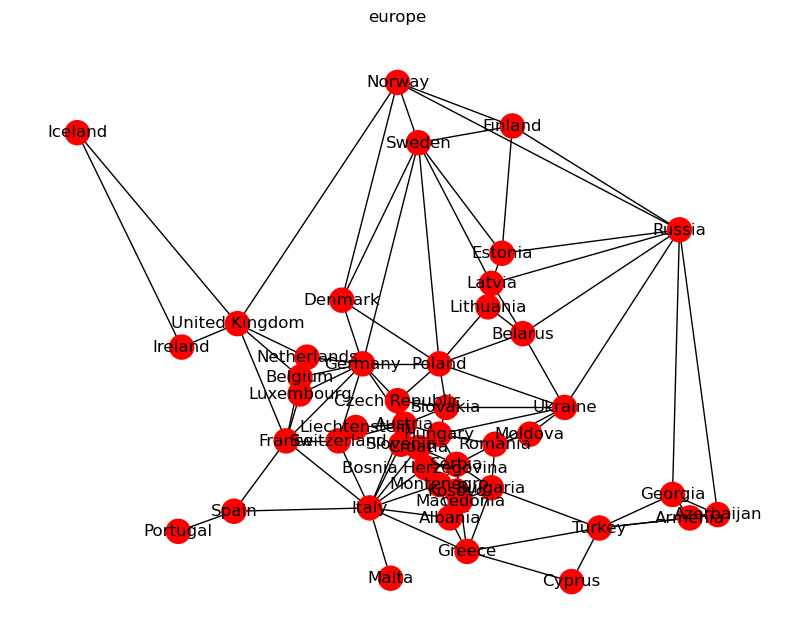

In [13]:
draw_map("europe", europe, (10,8), europe_colors)

<a id="three_eu"></a>
## Does the Four Color Theorem apply here?

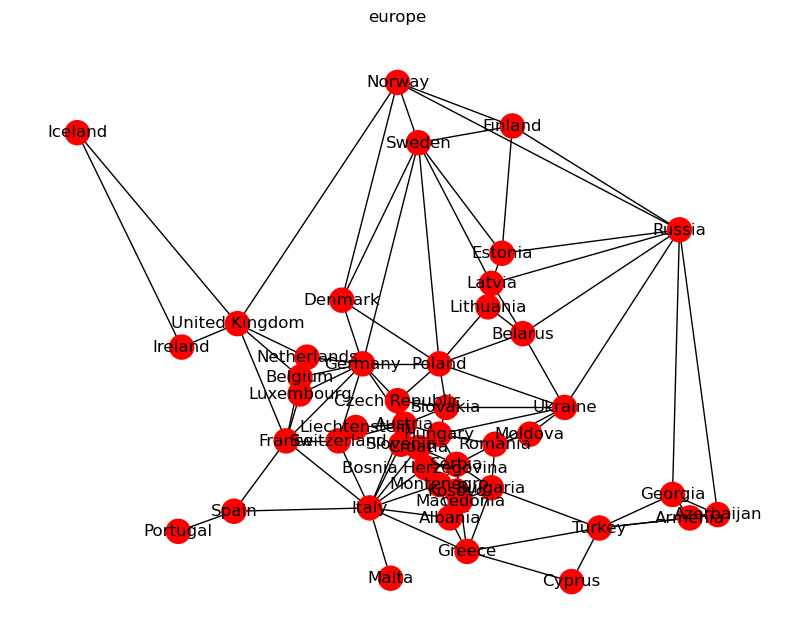

In [14]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=False)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.